In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [689]:
df = pd.read_csv("C:\\Users\\Asus\\Downloads\\data_cleaning_powerBI\\table.csv")
df.head()

,emp_id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,NaN,Cleveland,Ohio,33
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,NaN,Cleveland,Ohio,40
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,NaN,Cleveland,Ohio,35
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,NaN,Cleveland,Ohio,42
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan,30


In [690]:
pd.options.display.max_columns = 50

In [691]:
df.dtypes

emp_id            object
first_name        object
last_name         object
birthdate         object
gender            object
race              object
department        object
jobtitle          object
location          object
hire_date         object
termdate          object
location_city     object
location_state    object
age                int64
dtype: object

In [692]:
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')
df['termdate'] = pd.to_datetime(df['termdate'], errors='coerce')
df['tenure'] = (df['termdate'] - df['hire_date']).dt.days/365
df['tenure']

0           NaN
1           NaN
2           NaN
3           NaN
4      19.09589
         ...   
995         NaN
996         NaN
997         NaN
998         NaN
999         NaN
Name: tenure, Length: 1000, dtype: float64

In [693]:
df.head()


,emp_id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age,tenure
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,NaT,Cleveland,Ohio,33,NaN
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,NaT,Cleveland,Ohio,40,NaN
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,NaT,Cleveland,Ohio,35,NaN
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,NaT,Cleveland,Ohio,42,NaN
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan,30,19.09589


In [694]:
df['turnover'] = df['termdate'].apply(lambda x: 1 if pd.notnull(x) else 0)
df['turnover']


0      0
1      0
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: turnover, Length: 1000, dtype: int64

In [695]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['location'] = df['location'].apply(lambda x: 1 if x == 'Headquarters' else 0)


In [696]:
df.head()

,emp_id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age,tenure,turnover
0,00-0037846,Kimmy,Walczynski,1991-06-04,1,Hispanic or Latino,Engineering,Programmer Analyst I,1,2002-01-20,NaT,Cleveland,Ohio,33,NaN,0
1,00-0041533,Ignatius,Springett,1984-06-29,1,White,Business Development,Business Analyst,1,2019-04-08,NaT,Cleveland,Ohio,40,NaN,0
2,00-0045747,Corbie,Bittlestone,1989-07-29,1,Black or African American,Sales,Solutions Engineer Manager,1,2010-10-12,NaT,Cleveland,Ohio,35,NaN,0
3,00-0055274,Baxy,Matton,1982-09-14,0,White,Services,Service Tech,1,2005-04-10,NaT,Cleveland,Ohio,42,NaN,0
4,00-0076100,Terrell,Suff,1994-04-11,0,Two or More Races,Product Management,Business Analyst,0,2010-09-29,2029-10-29,Flint,Michigan,30,19.09589,1


In [697]:
df = df.join(pd.get_dummies(df['race'])).drop('race', axis = 1)
df = df.join(pd.get_dummies(df['department'], prefix = 'department')).drop('department', axis = 1)
df = df.join(pd.get_dummies(df['jobtitle'], prefix = 'job')).drop('jobtitle', axis = 1)

In [698]:
df = df.join(pd.get_dummies(df['location_state'], prefix='state')).drop('location_state', axis=1)


In [699]:
df

,emp_id,first_name,last_name,birthdate,gender,location,hire_date,termdate,location_city,age,tenure,turnover,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,department_Accounting,department_Auditing,department_Business Development,department_Engineering,department_Human Resources,department_Legal,...,job_Support Staff III,job_Systems Administrator I,job_Systems Administrator II,job_Systems Administrator III,job_Systems Administrator IV,job_Tax Accountant,job_Trainer I,job_Trainer II,job_Trainer III,job_Training Manager,job_VP Accounting,job_VP Marketing,job_VP Quality Control,job_Web Designer IV,job_Web Developer I,job_Web Developer II,job_Web Developer III,job_Web Developer IV,state_Illinois,state_Indiana,state_Kentucky,state_Michigan,state_Ohio,state_Pennsylvania,state_Wisconsin
0,00-0037846,Kimmy,Walczynski,1991-06-04,1,1,2002-01-20,NaT,Cleveland,33,NaN,0,False,False,False,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,00-0041533,Ignatius,Springett,1984-06-29,1,1,2019-04-08,NaT,Cleveland,40,NaN,0,False,False,False,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,00-0045747,Corbie,Bittlestone,1989-07-29,1,1,2010-10-12,NaT,Cleveland,35,NaN,0,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,00-0055274,Baxy,Matton,1982-09-14,0,1,2005-04-10,NaT,Cleveland,42,NaN,0,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,00-0076100,Terrell,Suff,1994-04-11,0,0,2010-09-29,2029-10-29,Flint,30,19.09589,1,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,04-5001304,Sadella,Colcutt,1991-10-06,0,0,2001-07-30,NaT,Philadelphia,33,NaN,0,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
996,04-5004960,Allianora,Hardage,1994-01-15,1,1,2005-01-02,NaT,Cleveland,31,NaN,0,False,False,False,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
997,04-5047920,Kelby,Rycroft,1971-03-25,1,1,2005-08-29,NaT,Cleveland,53,NaN,0,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
998,04-5106789,Hartwell,Bercher,1981-06-06,1,1,2015-10-11,NaT,Cleveland,43,NaN,0,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [700]:
df['temp_tenure'] = (pd.Timestamp.today() - df['hire_date']).dt.days / 365

df['tenure'] = df['tenure'].fillna(df['temp_tenure'])

df.drop(columns=['temp_tenure'], inplace=True)

In [701]:
df['tenure']

0      23.172603
1       5.947945
2      14.441096
3      19.950685
4      19.095890
         ...    
995    23.649315
996    20.219178
997    19.564384
998     9.441096
999    10.367123
Name: tenure, Length: 1000, dtype: float64

In [702]:
df['tenure_type'] = df['tenure'].isna().map({True: 'still_employed', False: 'terminated'})


In [703]:
df['tenure_type']

0      terminated
1      terminated
2      terminated
3      terminated
4      terminated
          ...    
995    terminated
996    terminated
997    terminated
998    terminated
999    terminated
Name: tenure_type, Length: 1000, dtype: object

In [704]:
df.drop(columns=['termdate','hire_date','emp_id','location_city','first_name','last_name','birthdate',], inplace=True)

In [705]:
df

,gender,location,age,tenure,turnover,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,department_Accounting,department_Auditing,department_Business Development,department_Engineering,department_Human Resources,department_Legal,department_Marketing,department_Product Management,department_Research and Development,department_Sales,department_Services,department_Support,department_Training,...,job_Systems Administrator I,job_Systems Administrator II,job_Systems Administrator III,job_Systems Administrator IV,job_Tax Accountant,job_Trainer I,job_Trainer II,job_Trainer III,job_Training Manager,job_VP Accounting,job_VP Marketing,job_VP Quality Control,job_Web Designer IV,job_Web Developer I,job_Web Developer II,job_Web Developer III,job_Web Developer IV,state_Illinois,state_Indiana,state_Kentucky,state_Michigan,state_Ohio,state_Pennsylvania,state_Wisconsin,tenure_type
0,1,1,33,23.172603,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated
1,1,1,40,5.947945,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated
2,1,1,35,14.441096,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated
3,0,1,42,19.950685,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated
4,0,0,30,19.095890,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,terminated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,33,23.649315,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,terminated
996,1,1,31,20.219178,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated
997,1,1,53,19.564384,0,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated
998,1,1,43,9.441096,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,terminated


In [706]:
df['tenure_type'] = df['tenure_type'].apply(lambda x: 1 if x == 'terminated' else 0)


In [707]:
df

,gender,location,age,tenure,turnover,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,department_Accounting,department_Auditing,department_Business Development,department_Engineering,department_Human Resources,department_Legal,department_Marketing,department_Product Management,department_Research and Development,department_Sales,department_Services,department_Support,department_Training,...,job_Systems Administrator I,job_Systems Administrator II,job_Systems Administrator III,job_Systems Administrator IV,job_Tax Accountant,job_Trainer I,job_Trainer II,job_Trainer III,job_Training Manager,job_VP Accounting,job_VP Marketing,job_VP Quality Control,job_Web Designer IV,job_Web Developer I,job_Web Developer II,job_Web Developer III,job_Web Developer IV,state_Illinois,state_Indiana,state_Kentucky,state_Michigan,state_Ohio,state_Pennsylvania,state_Wisconsin,tenure_type
0,1,1,33,23.172603,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
1,1,1,40,5.947945,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
2,1,1,35,14.441096,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
3,0,1,42,19.950685,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
4,0,0,30,19.095890,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,33,23.649315,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1
996,1,1,31,20.219178,0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
997,1,1,53,19.564384,0,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
998,1,1,43,9.441096,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1


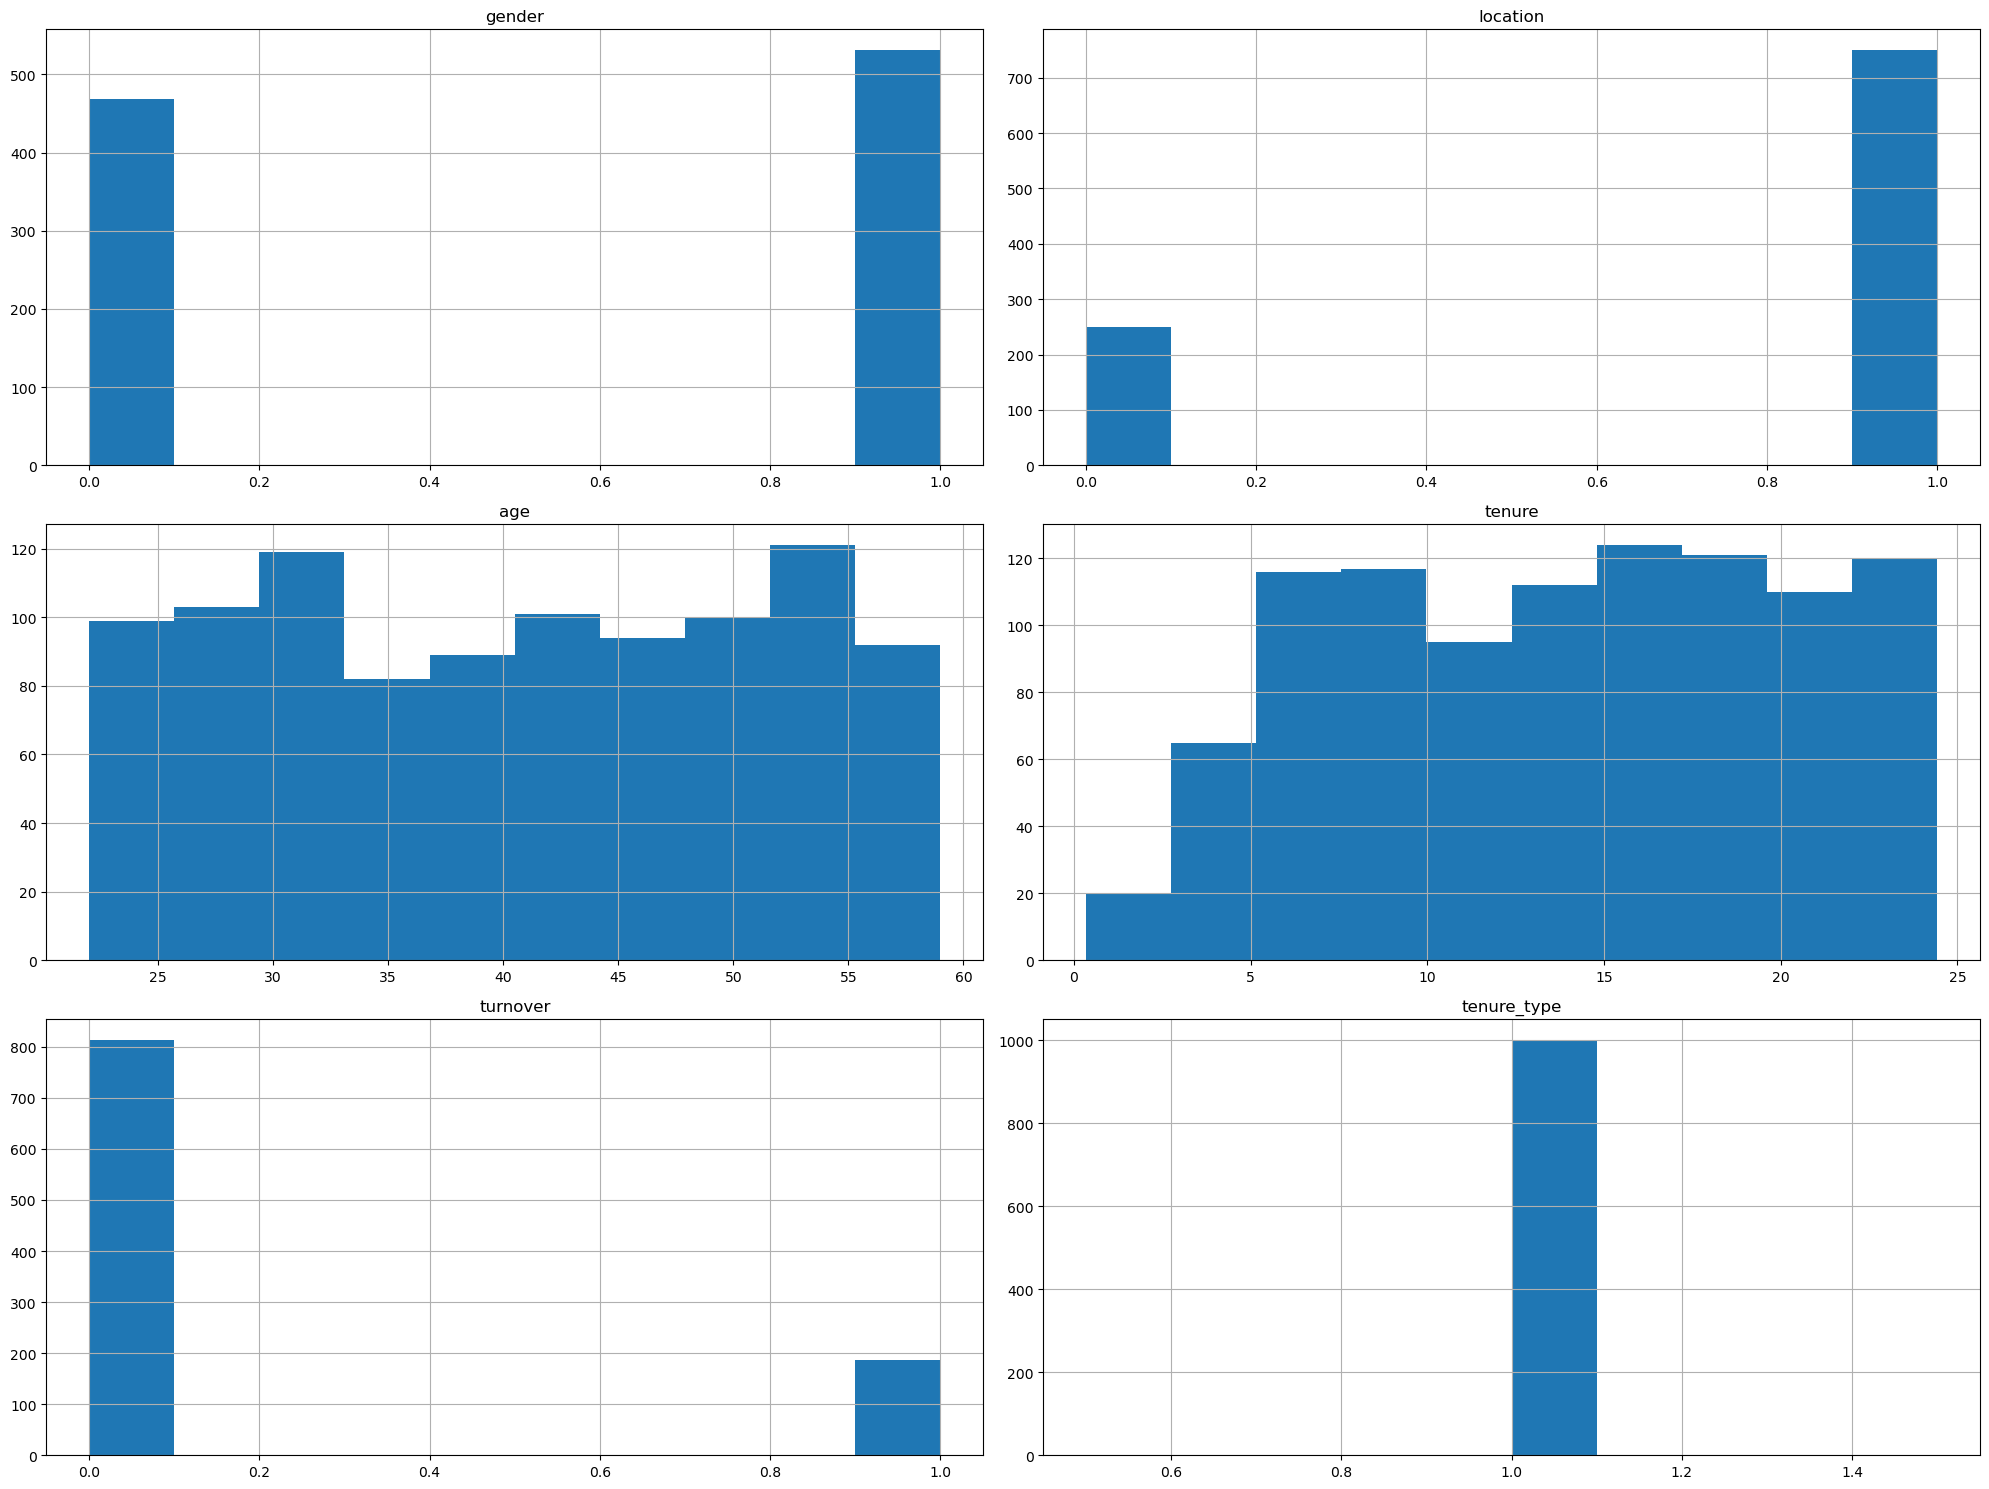

In [708]:
df.hist(figsize = (20, 15))
plt.tight_layout()
plt.show()

tenure_type kept to distinguish actual turnovers from estimated turnovers for current employees

In [744]:
X, y = df.drop('turnover', axis = 1), df['turnover']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [711]:
model.score(X_test, y_test)

0.86

In [746]:
model.feature_importances_

array([3.55091715e-02, 2.21862943e-02, 1.32407804e-01, 2.67320958e-01,
       1.08004862e-02, 2.05126659e-02, 1.68682809e-02, 1.32261126e-02,
       1.07035862e-02, 2.03044935e-02, 2.63497429e-02, 5.89244413e-03,
       1.64764713e-03, 8.53616522e-03, 9.21712504e-03, 6.81150477e-03,
       2.29821273e-03, 1.39124959e-03, 2.74008159e-03, 1.31147053e-02,
       5.32576455e-03, 6.17684430e-03, 5.57127356e-03, 6.01668378e-03,
       4.57610009e-03, 3.38012182e-03, 4.44484902e-04, 3.94765390e-05,
       2.44124519e-03, 2.19988753e-03, 4.70197449e-03, 1.49403134e-06,
       2.25885221e-03, 7.15121831e-03, 4.44893257e-05, 1.19225858e-04,
       3.60350452e-03, 3.79390665e-04, 4.21272922e-03, 5.56972534e-03,
       6.90405669e-03, 4.62342616e-05, 3.95772866e-03, 1.05346049e-04,
       1.46984924e-03, 0.00000000e+00, 2.01654045e-04, 3.87021368e-05,
       3.03303933e-03, 2.67561105e-04, 6.25233697e-03, 2.44412277e-05,
       5.14337725e-03, 5.64516037e-05, 1.62040791e-04, 2.96181100e-04,
      

In [713]:
sorted_importances = dict(sorted(zip(df.columns, model.feature_importances_), key = lambda x:x[1], reverse = True))
sorted_importances


{'tenure': 0.26154459786922857,
 'age': 0.13877989160015194,
 'gender': 0.03719876900342442,
 'Two or More Races': 0.024057714572326746,
 'Native Hawaiian or Other Pacific Islander': 0.02166276033488106,
 'American Indian or Alaska Native': 0.018767542661202567,
 'Asian': 0.017833348837342906,
 'location': 0.017825927145818078,
 'Black or African American': 0.013186367071797423,
 'department_Product Management': 0.012973231264739926,
 'state_Michigan': 0.012135370366952516,
 'turnover': 0.011182983032911145,
 'job_Human Resources Analyst': 0.010306270200617055,
 'department_Business Development': 0.009949798686124141,
 'job_Research Assistant IV': 0.009516157935283957,
 'department_Engineering': 0.009509098005347497,
 'job_Budget/Accounting Analyst IV': 0.008430608261065122,
 'White': 0.008158847337285724,
 'department_Auditing': 0.007917649087941639,
 'job_Accountant IV': 0.007898421661047204,
 'job_Accounting Assistant III': 0.007503845798591202,
 'job_Structural Analysis Engineer': 

looks like the model is giving higher importance to tenure than to tenure_type

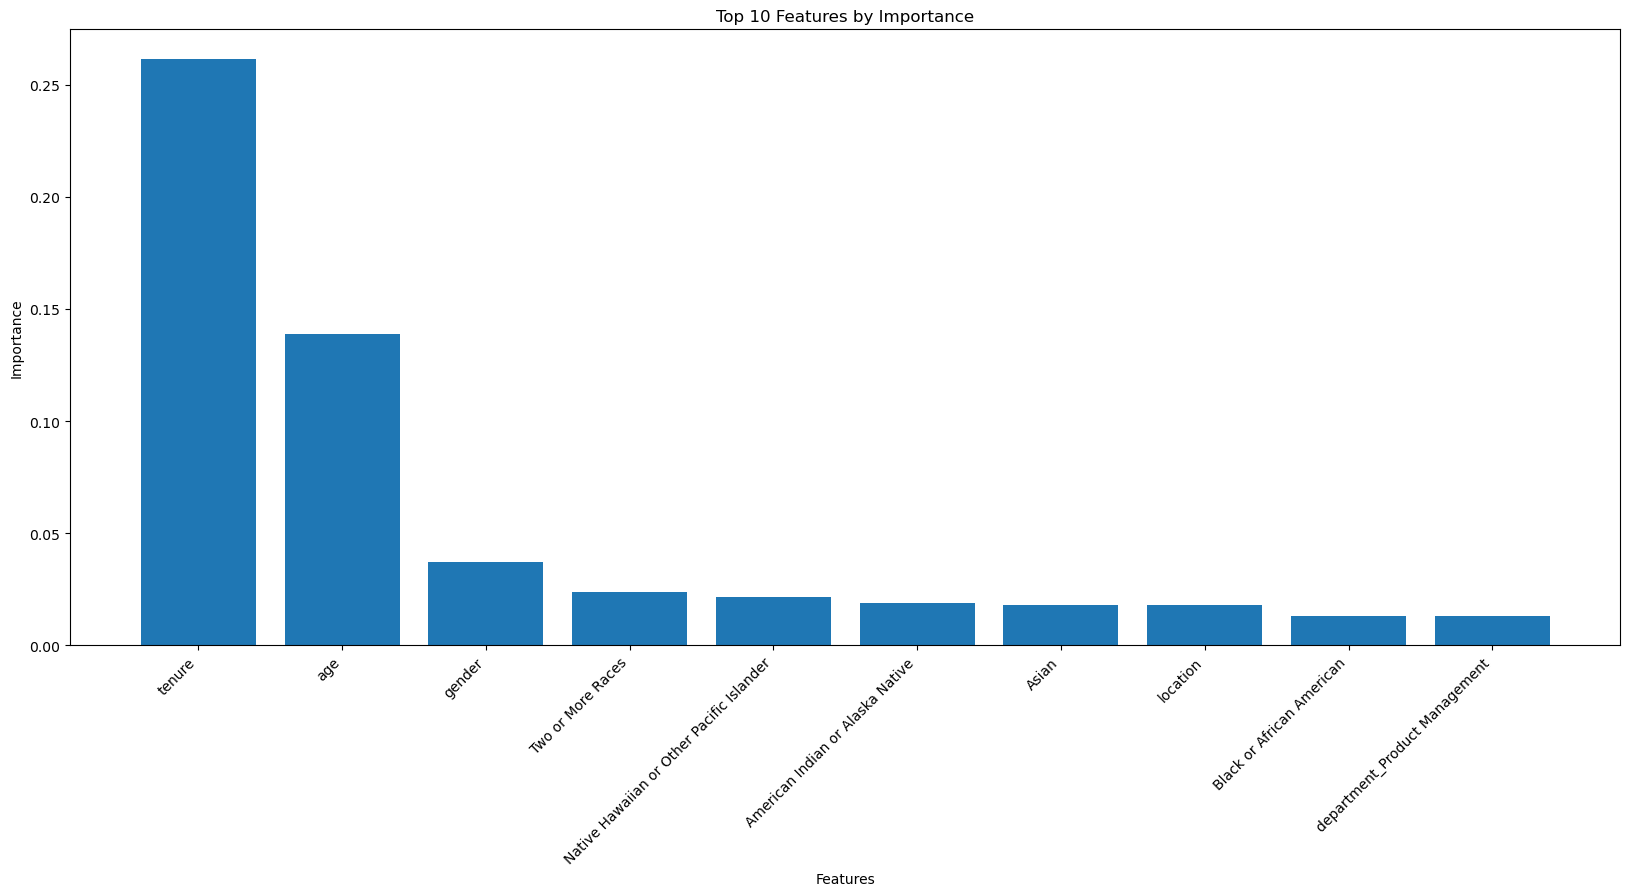

In [758]:
top_n = 10 
sorted_importances = dict(list(sorted_importances.items())[:top_n])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {top_n} Features by Importance')
plt.show()